<a href="https://colab.research.google.com/github/Yashitha-Reddy/OIBGRIP-TASK1/blob/main/ensembled_techniques_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/TelcomCustomer-Churn_1.csv')

In [ ]:
#1 b.Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable
import pandas as pd


df1 = pd.read_csv('/content/drive/MyDrive/TelcomCustomer-Churn_2.csv')

In [ ]:
#checking wheather the dataframes are loaded
print("df shape:", df.shape)
print("df columns:", df.columns)

# Print shape and columns of df2
print("df1 shape:", df1.shape)
print("df1 columns:", df1.columns)

df shape: (7043, 10)
df columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')
df1 shape: (7043, 12)
df1 columns: Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
#1 c.Merge both the DataFrames on key ‘customerID’ to form a single DataFrame
merged_df = pd.merge(df, df1, on='customerID')

In [ ]:
print(merged_df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [ ]:
#1 d.Verify if all the columns are incorporated in the merged DataFrame by using simple comparisonOperator in Python
df_columns = df.columns.tolist()
df1_columns = df1.columns.tolist()
merged_columns = merged_df.columns.tolist()


if set(df_columns + df1_columns) == set(merged_columns):
    print("All columns are incorporated in the merged DataFrame.")
else:
    print("Not all columns are incorporated in the merged DataFrame.")

All columns are incorporated in the merged DataFrame.


In [ ]:
#2a Impute missing/unexpected values in the DataFrame
merged_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
merged_df[merged_df["TotalCharges"]=='']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
#2 b Make sure all the variables with continuous values are of ‘Float’ type
import numpy as np
# Specify the columns to convert to float
columns_to_convert = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convert empty strings to NaN
merged_df[columns_to_convert] = merged_df[columns_to_convert].replace(' ', np.nan)

# Convert the columns to 'float' type
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#2 c Create a function that will accept a DataFrame as input and return pie-charts for all theappropriate Categorical features. Clearly show percentage distribution in the pie-chart.
import matplotlib.pyplot as plt

def generate_pie_charts(dataframe):
    # Get the column names and data types of the DataFrame
    columns = dataframe.columns
    dtypes = dataframe.dtypes

    # Iterate over the columns
    for column in columns:
        # Check if the column is categorical (object dtype)
        if dtypes[column] == 'object':
            # Count the occurrence of each category
            category_counts = dataframe[column].value_counts()

            # Calculate the percentage distribution
            category_percentages = category_counts / category_counts.sum() * 100

            # Generate the pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(category_percentages, labels=category_counts.index, autopct='%1.1f%%')
            plt.title(f'{column} - Percentage Distribution')
            plt.show()

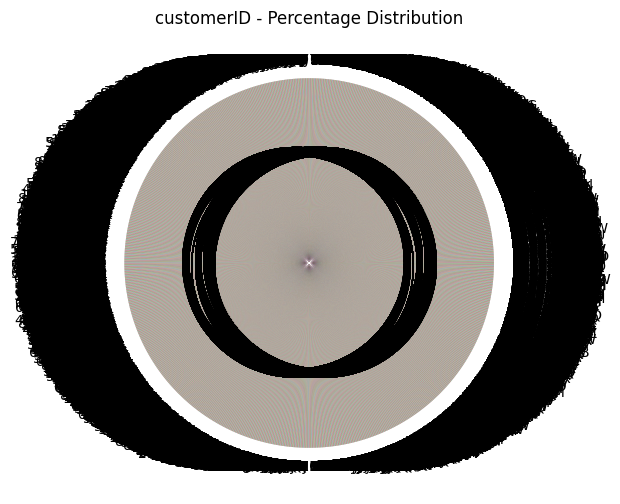

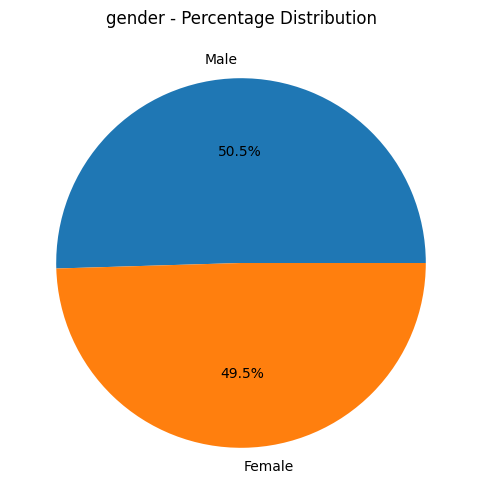

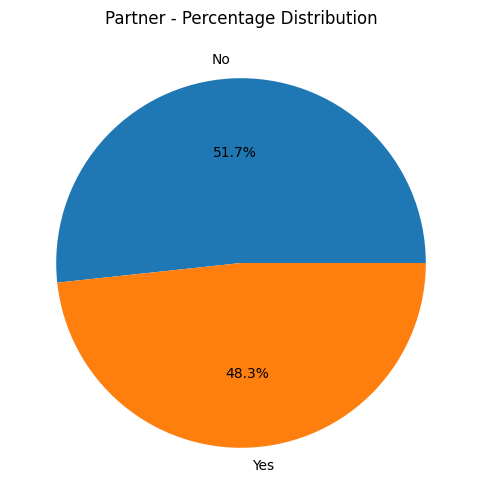

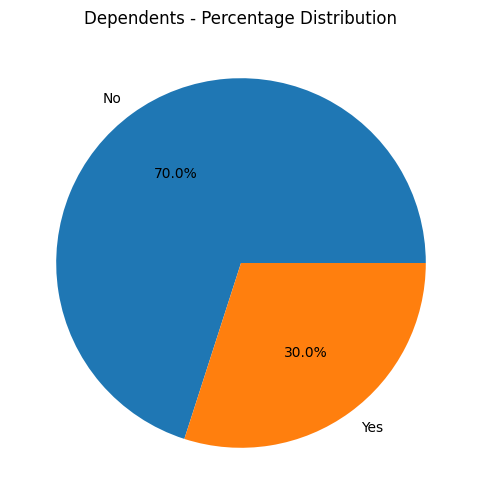

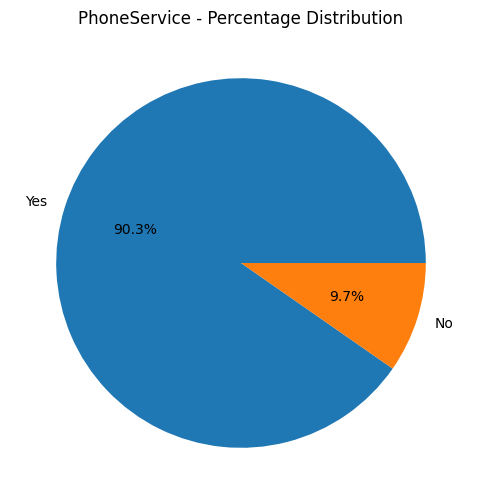

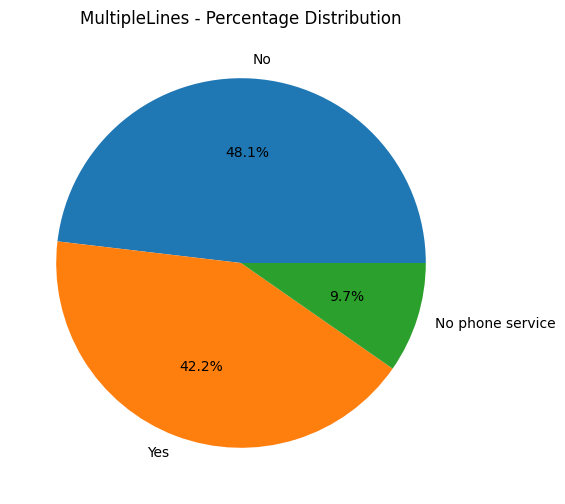

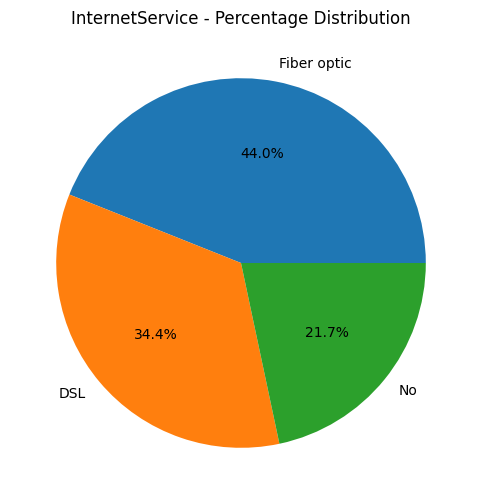

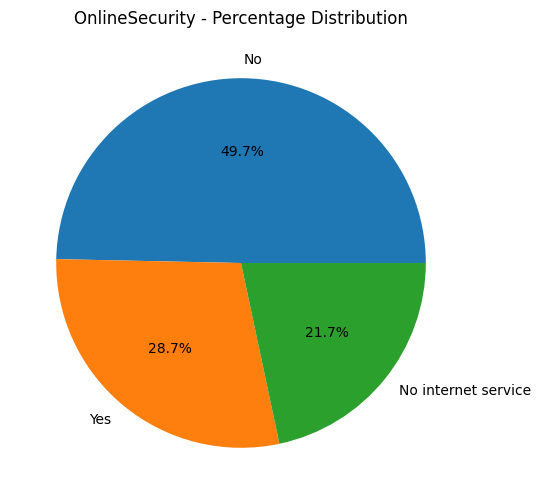

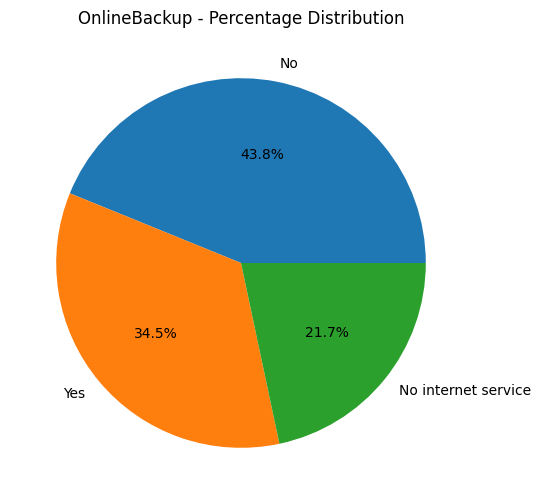

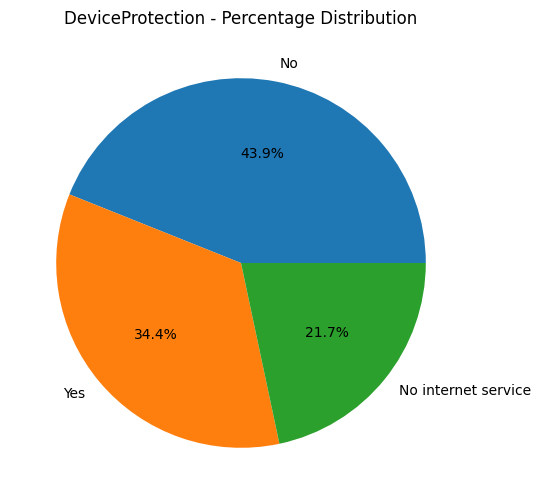

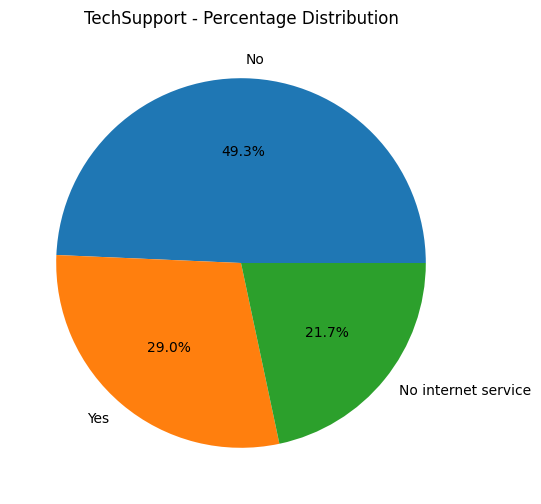

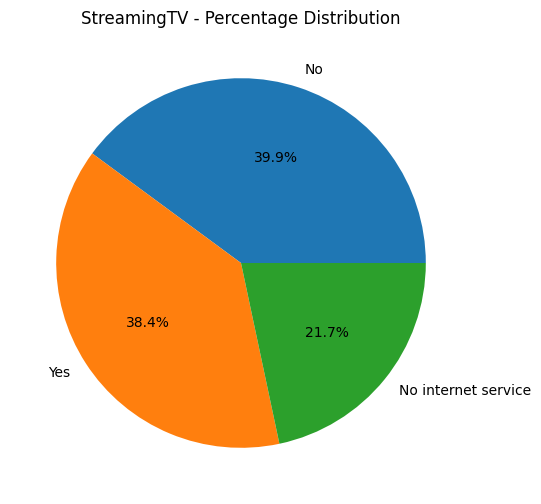

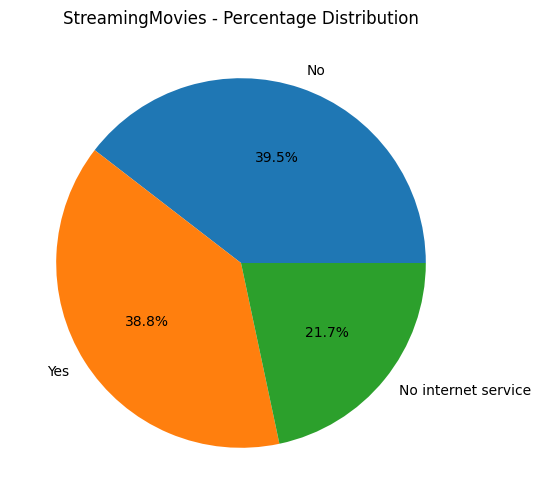

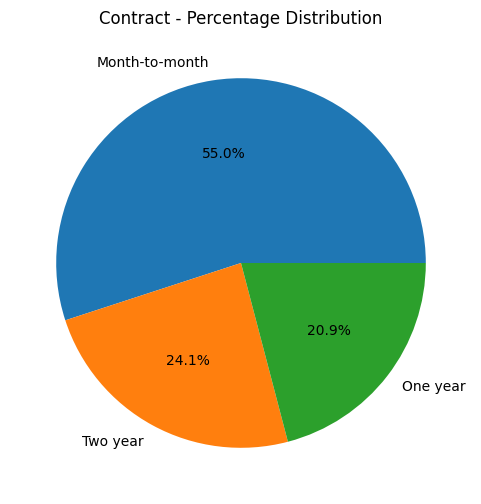

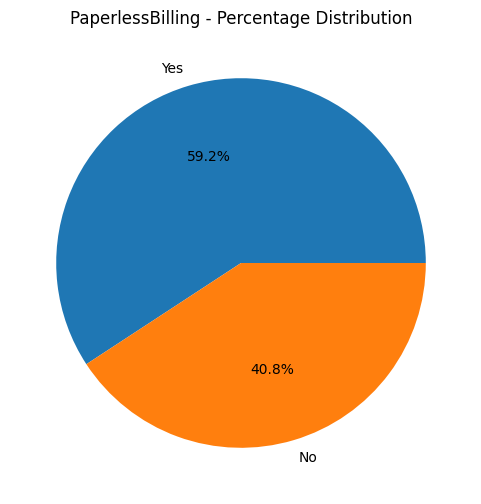

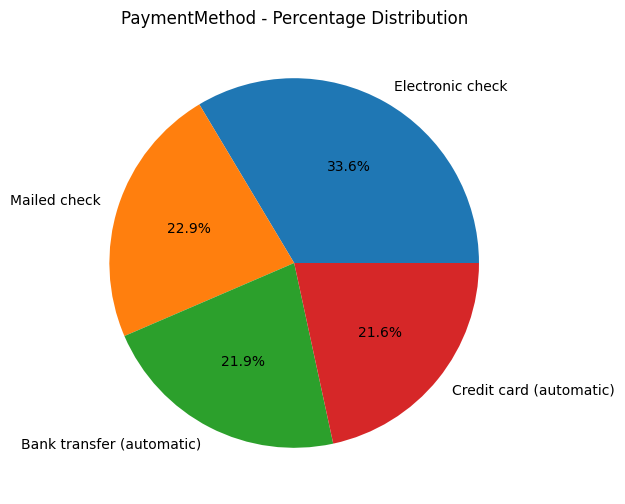

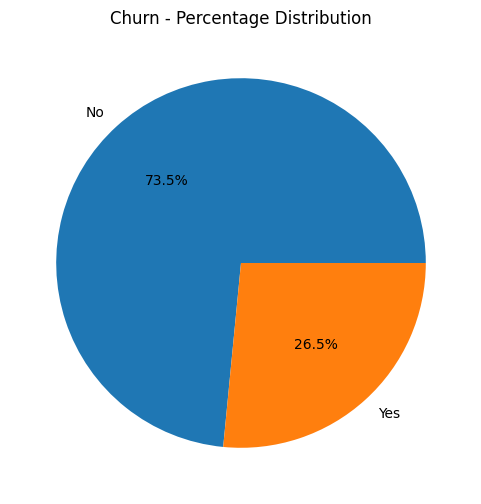

In [ ]:
generate_pie_charts(merged_df)


2 d.Share insights for Q2.c
```
# This is formatted as code
```1.When we take male and female percentage it is showing male percentage is more  compared to female percentage
   2 when we take partener percentage we have two fields yes or no in which 51% is no and 48 percent is 48
   3. in dependent percentage is there two fields yes or no in which 70% is no and 30 is yes
   4 in phone sevieces percentage 90 % people have phone services
   5 In multiple lines there are 48.1% people who dont have multiple lines,42% people who have mulitiple lines and 9% percent who dont have
   6 In Internet services 44% is fibre optic 34% is DSL 21% no services
   7 In online security 49.7 has no security 28.7% has security 21 have no internet servies
   8 Device protection 43.9% have no device protection and 34.4 % has device protection 21.7% has no  interrnet services
   9 Tech support 49.3 has no techsupport 29.0 has tech support 21% has no internet service
   10.Streaming Tv 38% has support 39% has no streaming support 21% has no internet services
   11.Streaming movies39.5% people movies streamed 38.8 % didnt stream 21.7 have no internet services
   12.contract 55% are month to month contract 24% 2 year contract 20% are one year
   13.Paperlessbilling 59.2 percent and 40.8 are yes and no
   14 payment method 33% electronic check,22% mailed check 21.6 credit card ,21% Bank transfer
   15.churn percentage 73.5% no and remaining is yes



In [ ]:
#2 e.Encode all the appropriate Categorical features with the best suitable approach
import pandas as pd

# Select the categorical features to encode
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Perform one-hot encoding using pandas get_dummies()
encoded_df = pd.get_dummies(merged_df, columns=categorical_features)

# Print the encoded DataFrame
print(encoded_df.head())

   customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  \
0  7590-VHVEG              0     1.0           29.85         29.85   
1  5575-GNVDE              0    34.0           56.95       1889.50   
2  3668-QPYBK              0     2.0           53.85        108.15   
3  7795-CFOCW              0    45.0           42.30       1840.75   
4  9237-HQITU              0     2.0           70.70        151.65   

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0              1            0           0            1              1  ...   
1              0            1           1            0              1  ...   
2              0            1           1            0              1  ...   
3              0            1           1            0              1  ...   
4              1            0           1            0              1  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                  0                  0       

In [ ]:
#2 f.Split the data into 80% train and 20% test.
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = merged_df.drop("Churn", axis=1)  # Features (all columns except "Churn")
y = merged_df["Churn"]  # Target variable ("Churn" column)

# Split the data into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
#2 g.Normalize/Standardize the data with the best suitable approach

from sklearn.preprocessing import MinMaxScaler

# Select only the numeric columns for normalization
numeric_columns = X_train.select_dtypes(include='number').columns

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numeric_columns])

# Transform the training and test data using the scaler
X_train_normalized = scaler.transform(X_train[numeric_columns])
X_test_normalized = scaler.transform(X_test[numeric_columns])

In [ ]:
print("Normalized training data:")
print(X_train_normalized)

print("Normalized test data:")
print(X_test_normalized)

Normalized training data:
[[0.         1.         0.66517413 0.70812202]
 [1.         0.19444444 0.27960199 0.07545047]
 [0.         0.98611111 0.0641791  0.20675171]
 ...
 [0.         0.80555556 0.02487562 0.13467652]
 [1.         0.01388889 0.51243781 0.00587356]
 [0.         0.05555556 0.02139303 0.00872957]]
Normalized test data:
[[0.         0.26388889 0.39751244 0.11844056]
 [0.         0.83333333 0.97860697 0.81129593]
 [0.         0.18055556 0.53432836 0.10443171]
 ...
 [1.         0.77777778 0.93233831 0.73852838]
 [0.         0.25       0.37810945 0.10973984]
 [0.         0.01388889 0.27412935 0.00310987]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns for standardization
numeric_columns = X_train.select_dtypes(include='number').columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train[numeric_columns])

# Transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

In [ ]:
print("standerdized training data:")
print(X_train_scaled)
print("\standarized test data:")
print(X_test_scaled)

standerdized training data:
[[-0.4397627   1.61253221  0.67415397  1.7033464 ]
 [ 2.27395367 -0.7479074  -0.61489382 -0.7112081 ]
 [-0.4397627   1.57183498 -1.3350973  -0.21010447]
 ...
 [-0.4397627   1.04277093 -1.46649701 -0.48517528]
 [ 2.27395367 -1.27697145  0.16352472 -0.97674435]
 [-0.4397627  -1.15487975 -1.47814002 -0.96584457]]
\standarized test data:
[[-0.4397627  -0.54442123 -0.22069469 -0.54713888]
 [-0.4397627   1.1241654   1.72202508  2.09710371]
 [-0.4397627  -0.78860463  0.23670937 -0.60060285]
 ...
 [ 2.27395367  0.96137646  1.56733934  1.81939053]
 [-0.4397627  -0.58511846 -0.2855629  -0.58034468]
 [-0.4397627  -1.27697145 -0.63318998 -0.98729182]]


In [ ]:
#3 a. Train a model using Decision tree and check the performance of the model on train and test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Train the decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_encoded, y_train)

# Make predictions on the training and test data
train_predictions = decision_tree.predict(X_train_encoded)
test_predictions = decision_tree.predict(X_test_encoded)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.9108981185658502
Test accuracy: 0.7310149041873669


In [ ]:
#3 b. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create the decision tree model
decision_tree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the training and test data using the best estimator
train_predictions = best_estimator.predict(X_train_encoded)
test_predictions = best_estimator.predict(X_test_encoded)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best parameters and accuracies
print("Best Parameters:", best_params)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train accuracy: 0.7777777777777778
Test accuracy: 0.7778566359119943


after grid search the accuracy decreased but it is more good model beacause it resolves the issue of overfitting and predicts correct for data

In [ ]:
#3 c. Train a model using Random forest and check the performance of the model on train and test data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Create and train the Random Forest model
forest = RandomForestClassifier()
forest.fit(X_train_encoded, y_train)

# Make predictions on the training and test data
train_predictions = forest.predict(X_train_encoded)
test_predictions = forest.predict(X_test_encoded)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracies
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.9108981185658502
Test accuracy: 0.7537260468417317


In [ ]:
#3 d. Use grid search and improve the performance of the Random tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding on categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the Random Forest model
forest = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(forest, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the training and test data using the best model
train_predictions = best_model.predict(X_train_encoded)
test_predictions = best_model.predict(X_test_encoded)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the best parameters and model performance
print("Best parameters:", best_params)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Train accuracy: 0.7850550230741924
Test accuracy: 0.7828246983676366


after grid search the accuracy decreased but it is more good model beacause it resolves the issue of overfitting and predicts correct for data



In [ ]:
#3e Train a model using Adaboost and check the performance of the model on train and test data
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Convert float columns to strings
float_columns = X_train.select_dtypes(include=[float]).columns
X_train[float_columns] = X_train[float_columns].astype(str)
X_test[float_columns] = X_test[float_columns].astype(str)

# Fill missing values with a constant placeholder
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# Create and train the AdaBoost model
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_encoded, y_train)

# Make predictions on the training and test data
train_predictions = adaboost.predict(X_train_encoded)
test_predictions = adaboost.predict(X_test_encoded)

# Evaluate the performance of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8061767838125665
Test Accuracy: 0.794180269694819


In [ ]:
#3 f.Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Convert float columns to strings
float_columns = X_train.select_dtypes(include=[float]).columns
X_train[float_columns] = X_train[float_columns].astype(str)
X_test[float_columns] = X_test[float_columns].astype(str)

# Fill missing values with a constant placeholder
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# Create and train the Adaboost model
adaboost = AdaBoostClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Get the best model and its hyperparameters
best_adaboost = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Make predictions on the training and test data
train_predictions = best_adaboost.predict(X_train_encoded)
test_predictions = best_adaboost.predict(X_test_encoded)

# Evaluate the performance of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Accuracy: 0.7974795882144124
Test Accuracy: 0.7842441447835344


after grid search the accuracy decreased but it is more good model beacause it resolves the issue of overfitting and predicts correct for data



In [ ]:
#3 g.Train a model using GradientBoost and check the performance of the model on train and test data
X_train_encoded = X_train_encoded.dropna()
y_train = y_train[X_train_encoded.index]
from sklearn.impute import SimpleImputer

# Create the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train_encoded)

# Transform the test data using the fitted imputer
X_test_imputed = imputer.transform(X_test_encoded)
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Create and train the HistGradientBoostingClassifier
hist_gradient_boost = HistGradientBoostingClassifier()
hist_gradient_boost.fit(X_train_encoded, y_train)

# Make predictions on the training and test data
train_predictions = hist_gradient_boost.predict(X_train_encoded)
test_predictions = hist_gradient_boost.predict(X_test_encoded)

# Evaluate the performance of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Train Accuracy: 0.882321618743344
Test Accuracy: 0.7877927608232789


In [ ]:
#3 h. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Define the column names or indices of numerical and categorical features
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create the GradientBoostingClassifier with the preprocessor
gradient_boost = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [3, 4, 5]
}

# Create the pipeline with preprocessing and GradientBoostingClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', gradient_boost)
])

# gridsearch with cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the training and test data
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Evaluate the performance of the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8107916222932198
Test Accuracy: 0.7885024840312278


after grid search the accuracy decreased but it is more good model beacause it resolves the issue of overfitting and predicts correct for data



3 i. Provide detailed analysis of the below steps:(1) Compare the performance of each model in train stage and test stage (2) Provide your observation on which model performed the best (3) Provide your reasoning on why the model performed best (4) Provide your final conclusion on your observation
4






1.Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train accuracy: 0.7777777777777778
Test accuracy: 0.7778566359119943 : for decision tree after performing grid search



Train accuracy: 0.9108981185658502
Test accuracy: 0.7537260468417317 for random forest


Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Train Accuracy: 0.7974795882144124
Test Accuracy: 0.7842441447835344 : for adaboost


Train Accuracy: 0.8107916222932198
Test Accuracy: 0.7885024840312278 : for gradient boost


2.Observation on which model performed the best:
 the Gradient Boost model performed the best in terms of test accuracy, with a score of 0.7885.

3.The Gradient Boost model might have performed better due to its ensemble nature, where it combines multiple weak learners (decision trees) to create a strong predictive model. The boosting algorithm used by Gradient Boost iteratively adjusts the weights of misclassified samples, focusing on the most challenging instances, which can lead to improved accuracy.

4.Gradient Boost model achieved the highest test accuracy among the models evaluated.